In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [280]:
train=pd.read_csv('file1.csv')
train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,22.765049,75.912471,19-03-2022,11:30,11:45,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,13.043041,77.813237,25-03-2022,19:45,19:50,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33
2,0x20f7,BANGRES18DEL01,37.0,4.4,12.913041,12.953041,77.723237,19-03-2022,13:50,13:55,Windy,High,0,Buffet,motorcycle,2.0,No,Metropolitian,42
3,0x7804,HYDRES13DEL02,28.0,4.9,17.431477,17.451477,78.420350,7/3/2022,0.458333333,11:15,Sandstorms,Low,1,Meal,scooter,1.0,No,Urban,19
4,0x7faf,RANCHIRES07DEL01,37.0,4.6,23.359407,23.429407,85.395055,18-03-2022,23:50,1,Stormy,Low,0,Meal,motorcycle,1.0,No,Metropolitian,25


In [281]:
test=pd.read_csv('test.csv')
test.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,11.043669,77.016494,30-03-2022,NaN,15:05,NaN,NaN,3,Drinks,electric_scooter,1.0,No,Metropolitian
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,13.085377,77.806664,29-03-2022,20:30,20:35,Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,27.001378,75.879034,10/3/2022,19:35,19:45,Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,26.856536,75.927333,2/4/2022,17:15,17:20,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,13.096047,80.328114,27-03-2022,18:25,18:40,Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian


In [282]:
train.isnull().sum() #checking null values in the training data set

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [283]:
train.shape

(45590, 19)

# Null Values Imputing

In [284]:
train['Delivery_person_Age'].fillna(int(train['Delivery_person_Age'].mean()), inplace=True)
train['Delivery_person_Ratings'].fillna((train['Delivery_person_Ratings'].mean()), inplace=True)
train['multiple_deliveries'].fillna((train['multiple_deliveries'].mean()), inplace=True)

In [285]:
cols = ['Festival','City','Weather conditions','Road_traffic_density']
train[cols]=train[cols].fillna(train[cols].mode().iloc[0])

In [286]:
train['distance']=(train['Delivery_location_latitude']*100)-(train['Restaurant_latitude']*100)

In [287]:
del train['Time_Orderd']
del train['Time_Order_picked']
del train['Order_Date']
del train['Delivery_location_longitude']
del train['Restaurant_latitude']
del train['Delivery_location_latitude']
del train['Delivery_person_ID']

In [288]:
train

,ID,Delivery_person_Age,Delivery_person_Ratings,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,0x4607,37.0,4.900000,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,2.0
1,0xb379,34.0,4.500000,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,13.0
2,0x20f7,37.0,4.400000,Windy,High,0,Buffet,motorcycle,2.0,No,Metropolitian,42,4.0
3,0x7804,28.0,4.900000,Sandstorms,Low,1,Meal,scooter,1.0,No,Urban,19,2.0
4,0x7faf,37.0,4.600000,Stormy,Low,0,Meal,motorcycle,1.0,No,Metropolitian,25,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45585,0xd82f,34.0,4.900000,Cloudy,Medium,2,Snack,scooter,0.0,No,Metropolitian,19,5.0
45586,0x98f6,20.0,4.800000,Sunny,Medium,1,Drinks,motorcycle,1.0,No,Metropolitian,14,6.0
45587,0x744,29.0,4.633767,Fog,Low,3,Snack,electric_scooter,1.0,No,Metropolitian,37,4.0
45588,0x419b,23.0,4.900000,Cloudy,Jam,2,Meal,motorcycle,1.0,No,Metropolitian,42,14.0


In [289]:
#INSIGHTS

In [290]:
train=train[['ID','Delivery_person_Age','Delivery_person_Ratings','Weather conditions','Road_traffic_density','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City','distance','Time_taken (min)']]

In [291]:
train

,ID,Delivery_person_Age,Delivery_person_Ratings,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,distance,Time_taken (min)
0,0x4607,37.0,4.900000,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,2.0,24
1,0xb379,34.0,4.500000,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,13.0,33
2,0x20f7,37.0,4.400000,Windy,High,0,Buffet,motorcycle,2.0,No,Metropolitian,4.0,42
3,0x7804,28.0,4.900000,Sandstorms,Low,1,Meal,scooter,1.0,No,Urban,2.0,19
4,0x7faf,37.0,4.600000,Stormy,Low,0,Meal,motorcycle,1.0,No,Metropolitian,7.0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45585,0xd82f,34.0,4.900000,Cloudy,Medium,2,Snack,scooter,0.0,No,Metropolitian,5.0,19
45586,0x98f6,20.0,4.800000,Sunny,Medium,1,Drinks,motorcycle,1.0,No,Metropolitian,6.0,14
45587,0x744,29.0,4.633767,Fog,Low,3,Snack,electric_scooter,1.0,No,Metropolitian,4.0,37
45588,0x419b,23.0,4.900000,Cloudy,Jam,2,Meal,motorcycle,1.0,No,Metropolitian,14.0,42


In [292]:
train['Festival'].unique()

array(['No', 'Yes'], dtype=object)

In [293]:
from sklearn.preprocessing import LabelEncoder
ll=LabelEncoder()     #to encode the labels into numerical form

In [294]:

train['Weather conditions'] = ll.fit_transform(train['Weather conditions'])
train['Road_traffic_density'] = ll.fit_transform(train['Road_traffic_density'])
train['Type_of_order'] = ll.fit_transform(train['Type_of_order'])
train['Festival'] = ll.fit_transform(train['Festival'])
train['City'] = ll.fit_transform(train['City'])

In [295]:
train['Type_of_vehicle'] = ll.fit_transform(train['Type_of_vehicle'])

In [296]:
train['ID'] = ll.fit_transform(train['ID'])

In [297]:
train

,ID,Delivery_person_Age,Delivery_person_Ratings,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,distance,Time_taken (min)
0,11168,37.0,4.900000,4,0,2,3,2,0.0,0,2,2.0,24
1,34962,34.0,4.500000,3,1,2,3,3,1.0,0,0,13.0,33
2,3441,37.0,4.400000,5,0,0,0,2,2.0,0,0,4.0,42
3,22052,28.0,4.900000,2,2,1,2,3,1.0,0,2,2.0,19
4,23724,37.0,4.600000,3,2,0,2,2,1.0,0,0,7.0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45585,42980,34.0,4.900000,0,3,2,3,3,0.0,0,0,5.0,19
45586,29191,20.0,4.800000,4,3,1,1,2,1.0,0,0,6.0,14
45587,21233,29.0,4.633767,1,2,3,3,1,1.0,0,0,4.0,37
45588,10184,23.0,4.900000,0,1,2,2,2,1.0,0,0,14.0,42


In [298]:
train.corr() 

,ID,Delivery_person_Age,Delivery_person_Ratings,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,distance,Time_taken (min)
ID,1.000000,-0.000938,0.009393,0.000616,0.000272,-0.012498,0.003344,0.003697,0.006974,0.007183,0.004948,0.023069,0.010028
Delivery_person_Age,-0.000938,1.000000,-0.067870,0.000675,-0.004051,0.001052,-0.005663,-0.006427,0.112188,0.056932,-0.059722,0.008132,0.292743
Delivery_person_Ratings,0.009393,-0.067870,1.000000,-0.019143,0.045054,0.033140,0.000598,0.016288,-0.114342,-0.058087,0.052970,-0.003663,-0.331114
Weather conditions,0.000616,0.000675,-0.019143,1.000000,-0.001570,-0.025675,-0.004172,0.004139,-0.065506,-0.058398,0.026165,-0.029127,-0.180541
Road_traffic_density,0.000272,-0.004051,0.045054,-0.001570,1.000000,0.006420,-0.000067,-0.002339,-0.075554,-0.068036,0.026036,0.008102,-0.182994
Vehicle_condition,-0.012498,0.001052,0.033140,-0.025675,0.006420,1.000000,0.002246,0.150303,-0.096238,-0.079095,0.037359,0.064189,-0.234423
Type_of_order,0.003344,-0.005663,0.000598,-0.004172,-0.000067,0.002246,1.000000,0.002904,-0.001850,0.003848,-0.001342,0.000897,0.002829
Type_of_vehicle,0.003697,-0.006427,0.016288,0.004139,-0.002339,0.150303,0.002904,1.000000,-0.038107,-0.027172,0.020026,-0.016430,-0.080566
multiple_deliveries,0.006974,0.112188,-0.114342,-0.065506,-0.075554,-0.096238,-0.001850,-0.038107,1.000000,0.141289,-0.064910,0.002285,0.382797
Festival,0.007183,0.056932,-0.058087,-0.058398,-0.068036,-0.079095,0.003848,-0.027172,0.141289,1.000000,-0.026330,0.001267,0.290045


In [299]:
X = train.iloc[:,:-1] #independent variables
y = train.iloc[:,-1]  #dependent variables-base_score 

In [300]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25003290195218)

In [301]:
y

0        24
1        33
2        42
3        19
4        25
         ..
45585    19
45586    14
45587    37
45588    42
45589    27
Name: Time_taken (min), Length: 45590, dtype: int64

In [302]:
X_test.shape

(11399, 12)

In [303]:
import xgboost as xg   
xgb_r = xg.XGBRegressor()

In [304]:
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [305]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45590 entries, 0 to 45589
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       45590 non-null  int32  
 1   Delivery_person_Age      45590 non-null  float64
 2   Delivery_person_Ratings  45590 non-null  float64
 3   Weather conditions       45590 non-null  int32  
 4   Road_traffic_density     45590 non-null  int32  
 5   Vehicle_condition        45590 non-null  int64  
 6   Type_of_order            45590 non-null  int32  
 7   Type_of_vehicle          45590 non-null  int32  
 8   multiple_deliveries      45590 non-null  float64
 9   Festival                 45590 non-null  int32  
 10  City                     45590 non-null  int32  
 11  distance                 45590 non-null  float64
 12  Time_taken (min)         45590 non-null  int64  
dtypes: float64(4), int32(7), int64(2)
memory usage: 3.3 MB


# Test Data

In [306]:
test

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,11.043669,77.016494,30-03-2022,NaN,15:05,NaN,NaN,3,Drinks,electric_scooter,1.0,No,Metropolitian
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,13.085377,77.806664,29-03-2022,20:30,20:35,Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,27.001378,75.879034,10/3/2022,19:35,19:45,Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,26.856536,75.927333,2/4/2022,17:15,17:20,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,13.096047,80.328114,27-03-2022,18:25,18:40,Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,0x6909,JAPRES01DEL01,35.0,4.6,26.905190,27.015190,75.920753,27-03-2022,21:35,21:45,Sunny,Jam,1,Snack,scooter,1.0,No,Metropolitian
11395,0x443b,JAPRES11DEL01,33.0,4.9,26.902940,26.912940,75.803007,11/3/2022,11:40,11:45,Sandstorms,High,1,Drinks,scooter,1.0,No,Metropolitian
11396,0x1ea5,SURRES11DEL03,NaN,NaN,21.157735,21.217735,72.828778,11/3/2022,NaN,21:05,NaN,NaN,3,Drinks,scooter,1.0,No,Metropolitian
11397,0x22d4,VADRES03DEL02,27.0,4.7,22.320000,22.450000,73.300000,6/3/2022,18:35,18:40,Sandstorms,Medium,0,Meal,motorcycle,0.0,No,Metropolitian


In [307]:
cols = ['Festival','City','Weather conditions','Road_traffic_density']
test[cols]=test[cols].fillna(test[cols].mode().iloc[0])

In [308]:
test['Delivery_person_Age'].fillna(int(test['Delivery_person_Age'].mean()), inplace=True)
test['Delivery_person_Ratings'].fillna((test['Delivery_person_Ratings'].mean()), inplace=True)
test['multiple_deliveries'].fillna((test['multiple_deliveries'].mean()), inplace=True)

In [309]:
test['distance']=(test['Delivery_location_latitude']*100)-(test['Restaurant_latitude']*100)
test=test[['ID','Delivery_person_Age','Delivery_person_Ratings','Weather conditions','Road_traffic_density','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City','distance']]

In [310]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       11399 non-null  object 
 1   Delivery_person_Age      11399 non-null  float64
 2   Delivery_person_Ratings  11399 non-null  float64
 3   Weather conditions       11399 non-null  object 
 4   Road_traffic_density     11399 non-null  object 
 5   Vehicle_condition        11399 non-null  int64  
 6   Type_of_order            11399 non-null  object 
 7   Type_of_vehicle          11399 non-null  object 
 8   multiple_deliveries      11399 non-null  float64
 9   Festival                 11399 non-null  object 
 10  City                     11399 non-null  object 
 11  distance                 11399 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.0+ MB


In [311]:
test['Weather conditions'] = ll.fit_transform(test['Weather conditions'])
test['Road_traffic_density'] = ll.fit_transform(test['Road_traffic_density'])
test['Type_of_order'] = ll.fit_transform(test['Type_of_order'])
test['Festival'] = ll.fit_transform(test['Festival'])
test['City'] = ll.fit_transform(test['City'])
test['Type_of_vehicle'] = ll.fit_transform(test['Type_of_vehicle'])
test['ID'] = ll.fit_transform(test['ID'])

C:\Users\Anupama Kandala\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Anupama Kandala\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Anupama Kandala\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [312]:
pred = xgb_r.predict(test)

In [313]:
test

,ID,Delivery_person_Age,Delivery_person_Ratings,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,distance
0,1005,29.0,4.632786,4,2,3,1,1,1.0,0,0,4.0
1,1879,28.0,4.600000,5,1,0,3,2,1.0,0,0,11.0
2,7053,23.0,4.500000,3,1,0,1,2,1.0,0,0,9.0
3,5217,21.0,4.800000,1,3,1,2,3,1.0,0,0,9.0
4,8096,31.0,4.600000,4,3,2,1,3,1.0,0,0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11394,4653,35.0,4.600000,4,1,1,3,3,1.0,0,0,11.0
11395,2692,33.0,4.900000,2,0,1,1,3,1.0,0,0,1.0
11396,773,29.0,4.632786,4,2,3,1,3,1.0,0,0,6.0
11397,995,27.0,4.700000,2,3,0,2,2,0.0,0,0,13.0


In [314]:
output = (pred)
df_output = pd.DataFrame()
temp = pd.read_csv('test.csv')
df_output['ID'] = temp['ID']
df_output["Time_taken (min)"] = output

In [315]:
print(df_output)

           ID  Time_taken (min)
0      0x2318         27.503918
1      0x3474         31.220585
2      0x9420         30.382874
3      0x72ee         31.207060
4      0xa759         22.207870
...       ...               ...
11394  0x6909         22.102833
11395  0x443b         29.433947
11396  0x1ea5         25.052250
11397  0x22d4         25.810356
11398  0xb7be         24.838924

[11399 rows x 2 columns]


In [316]:
final=df_output[['ID',"Time_taken (min)"]]
final.to_csv('submission.csv',index=False)

In [317]:
final

,ID,Time_taken (min)
0,0x2318,27.503918
1,0x3474,31.220585
2,0x9420,30.382874
3,0x72ee,31.207060
4,0xa759,22.207870
...,...,...
11394,0x6909,22.102833
11395,0x443b,29.433947
11396,0x1ea5,25.052250
11397,0x22d4,25.810356


In [318]:
import seaborn as sns

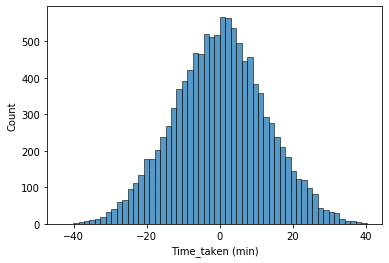

In [319]:
sns.histplot(y_test-pred)

In [320]:
from sklearn import metrics
#performance metrics for regression problem
print('r2:', metrics.r2_score(y_test, pred)) 

r2: -0.8325322456515831
